# Preliminaries

In [ ]:
# Auto-reload packages
%load_ext autoreload
%autoreload 2

In [ ]:
# Mount drive
from google.colab import drive, runtime
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import external packages
%pip install segment-geospatial groundingdino-py localtileserver
from samgeo import tms_to_geotiff
from samgeo.text_sam import LangSAM

In [ ]:
# Import internal packages
%cd drive/MyDrive/MLHC/satellite_semantic_segmentation/src
from ensemble_model import train_ensemble_model
from individual_model import train_individual_model
from tile_model import train_tile_model

/content/drive/MyDrive/MLHC/satellite_semantic_segmentation/src


# Model Inputs

In [ ]:
# Load SAM model
sam = LangSAM()

GroundingDINO_SwinB.cfg.py:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

final text_encoder_type: bert-base-uncased


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

groundingdino_swinb_cogcoor.pth:   0%|          | 0.00/938M [00:00<?, ?B/s]

Downloading: "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth" to /root/.cache/torch/hub/checkpoints/sam_vit_h_4b8939.pth
100%|██████████| 2.39G/2.39G [00:06<00:00, 382MB/s]


In [ ]:
# Define images to process
imgs = [
    "image_50001_2016-01-10", "image_50001_2016-03-06", "image_50001_2017-07-23", "image_50001_2018-09-02",
    "image_54001_2016-02-07", "image_54001_2018-02-18", "image_54001_2017-02-19", "image_54001_2016-04-17",
    "image_76001_2018-02-25", "image_76001_2016-09-04", "image_76001_2018-12-16", "image_76001_2017-02-05",
    "image_73001_2018-03-04", "image_73001_2018-10-21", "image_73001_2017-04-02", "image_73001_2016-07-03",
    "image_5001_2016-06-05", "image_5001_2018-02-11", "image_5001_2018-12-02", "image_5001_2017-01-29",
]

# Example Usage

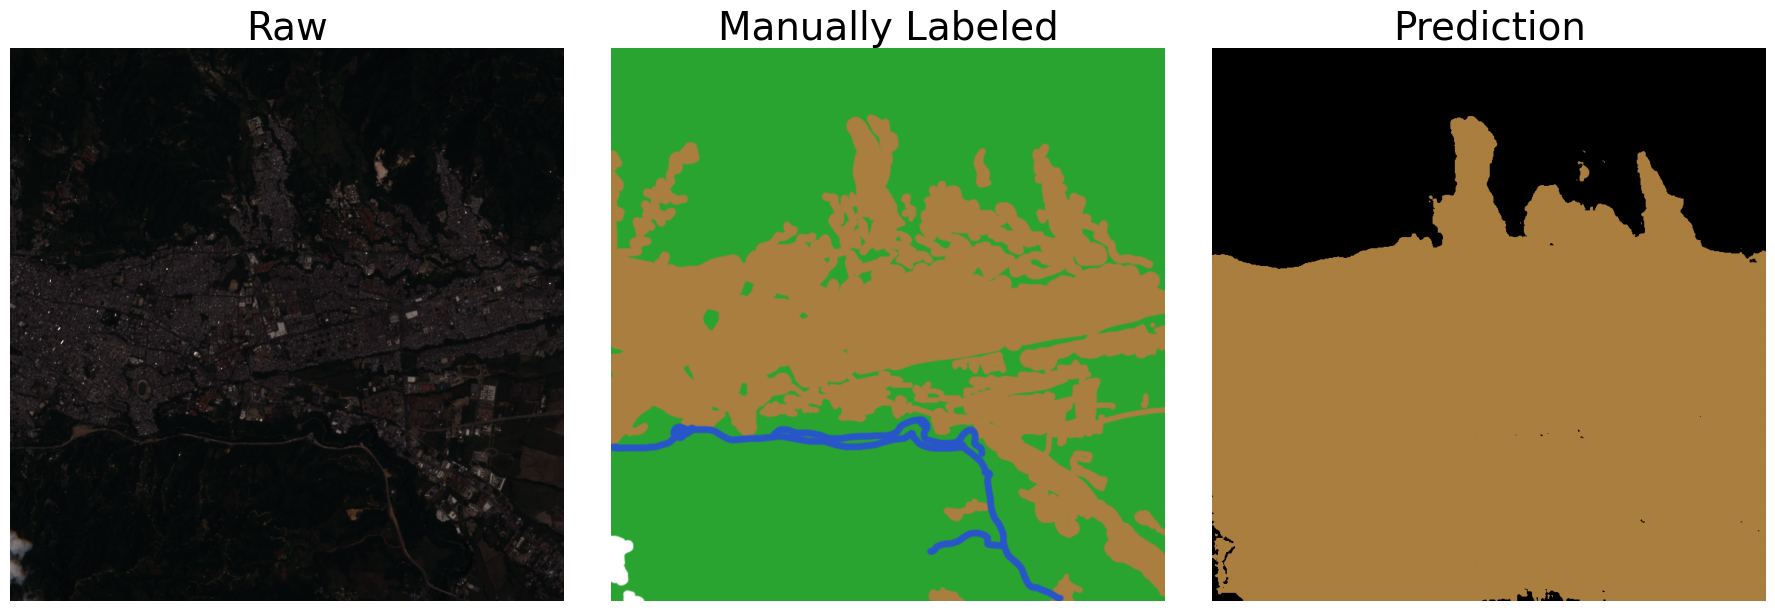

In [ ]:
# Train individual model using RGB images
train_individual_model(
    sam = sam,
    image = "image_73001_2018-03-04", folder = "rgb",
    prompt = "building", bt = 0.3, tt = 0.3, object_being_predicted = "Urban",
    save_images = False, save_results = False
)

No objects found in the image.


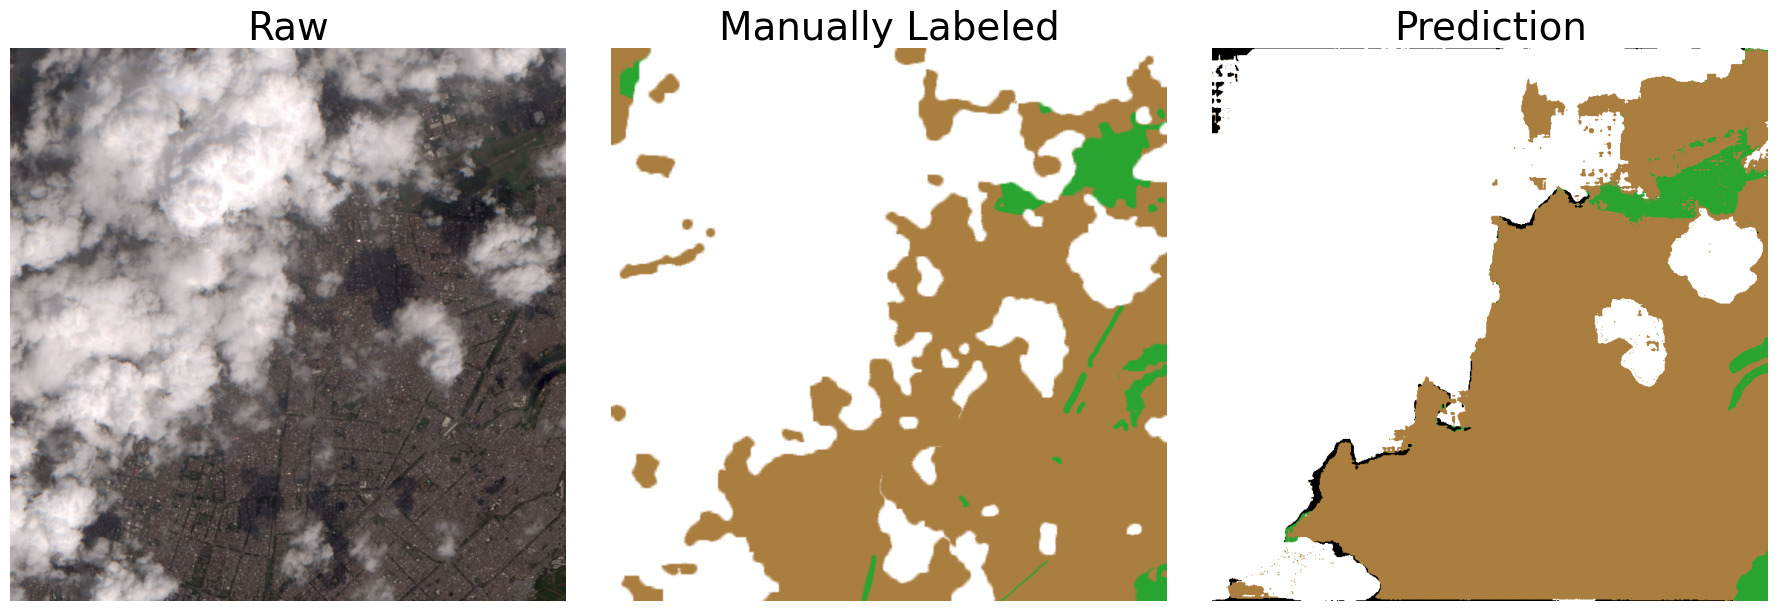

In [ ]:
# Train ensemble model
train_ensemble_model(
    sam = sam, image = "image_76001_2018-12-16",
    urban_prompt = "building", cloud_prompt = "cloud", tree_prompt = "vegetation", water_prompt = "", bt = 0.1, tt = 0.1,
    save_images = False, save_results = False
)

# Implement Models

## RGB Approach

In [ ]:
for img in imgs:

    # Urban areas
    train_individual_model(
        sam = sam,
        image = img, folder = "rgb",
        prompt = "building", bt = 0.3, tt = 0.3, object_being_predicted = "Urban",
        save_images = False, save_results = True
    )

    # Water features
    train_individual_model(
        sam = sam,
        image = img, folder = "rgb",
        prompt = "stream", bt = 0.5, tt = 0.5, object_being_predicted = "Water",
        save_images = False, save_results = True
    )

    # Trees
    train_individual_model(
        sam = sam,
        image = img, folder = "rgb",
        prompt = "vegetation", bt = 0.3, tt = 0.3, object_being_predicted = "Tree",
        save_images = False, save_results = True
    )

    # Clouds
    train_individual_model(
        sam = sam,
        image = img, folder = "rgb",
        prompt = "cloud", bt = 0.4, tt = 0.4, object_being_predicted = "Cloud",
        save_images = False, save_results = True
    )

Output hidden; open in https://colab.research.google.com to view.

## Gamma Approach

In [ ]:
for img in imgs:

    train_individual_model(
        sam = sam,
        image = img, folder = "gamma",
        prompt = "roof", bt = 0.3, tt = 0.3, object_being_predicted = "Urban",
        save_images = False, save_results = True
    )

    train_individual_model(
        sam = sam,
        image = img, folder = "gamma",
        prompt = "stream", bt = 0.5, tt = 0.5, object_being_predicted = "Water",
        save_images = False, save_results = True
    )

    train_individual_model(
        sam = sam,
        image = img, folder = "gamma",
        prompt = "plants", bt = 0.3, tt = 0.3, object_being_predicted = "Tree",
        save_images = False, save_results = True
    )

    train_individual_model(
        sam = sam,
        image = img, folder = "gamma",
        prompt = "cloud", bt = 0.4, tt = 0.4, object_being_predicted = "Cloud",
        save_images = False, save_results = True
    )

Output hidden; open in https://colab.research.google.com to view.

## Tile Approach

In [ ]:
for img in imgs:

    train_tile_model(
        sam = sam,
        image = img,
        prompt = "building", bt = 0.2, tt = 0.2, object_being_predicted = "Urban",
        save_images = False, save_results = True
    )

    train_tile_model(
        sam = sam,
        image = img,
        prompt = "river", bt = 0.2, tt = 0.2, object_being_predicted = "Water",
        save_images = False, save_results = True
    )

    train_tile_model(
        sam = sam,
        image = img,
        prompt = "plants", bt = 0.2, tt = 0.2, object_being_predicted = "Tree",
        save_images = False, save_results = True
    )

    train_tile_model(
        sam = sam,
        image = img,
        prompt = "cloud", bt = 0.5, tt = 0.5, object_being_predicted = "Cloud",
        save_images = False, save_results = True
    )

Output hidden; open in https://colab.research.google.com to view.

## Ensemble Approach

In [ ]:
# Define text and box thresholds
tts = [0.1, 0.2, 0.3, 0.4, 0.5]
bts = [0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5]

# Define prompts to consider
urban_prompts = ['building']
tree_prompts = ['vegetation']
water_prompts = ['']
cloud_prompts = ['cloud']

In [ ]:
for tt in tts:
    for bt in bts:
        for urban_prompt in urban_prompts:
            for tree_prompt in tree_prompts:
                for water_prompt in water_prompts:
                    for cloud_prompt in cloud_prompts:
                        for img in imgs:
                            train_ensemble_model(sam = sam, image = img, urban_prompt = urban_prompt, cloud_prompt = cloud_prompt, tree_prompt = tree_prompt, water_prompt = water_prompt, bt = bt, tt = tt, save_images = False, save_results = True)

In [ ]:
runtime.unassign()